## Imports

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.facecolor':'white'})


## Radius + Path

In [2]:
version = "v11_fast_init_pp_1s_big"
eval_dir = f"cl2_{version}"
train_dir = f"train_{version}"
# train_dir = f"train_v11"

Text(0.5, 1.0, 'cl2_v11_fast_init_pp_1s_big Radius (MAE=0.666) (lastMAE=2.034) (n=16)')

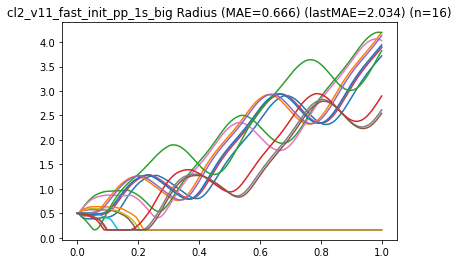

In [3]:
mean_radii = []
last_radii = []
counter = 0
for i, folder in enumerate(sorted(os.listdir(eval_dir))[-16:]):
    if i> 32:
        continue
    # extract radius.csv
    try:
        radius = np.loadtxt(os.path.join(eval_dir, folder, "radius.csv"), delimiter=",")
        plt.plot(np.linspace(0, 1, radius.shape[0]), radius)
        # plt.show()
        mean_radii.append(np.mean(np.abs(radius - 0.5)))
        last_radii.append(np.mean(np.abs(radius[-1] - 0.5)))
        counter += 1
    except:
        pass
mean_radii = np.array(mean_radii)
last_radii = np.array(last_radii)
plt.title(f"{eval_dir} Radius (MAE={np.mean(np.abs(mean_radii - 0.5)):.03f}) (lastMAE={np.mean(np.abs(last_radii - 0.5)):.03f}) (n={counter})")

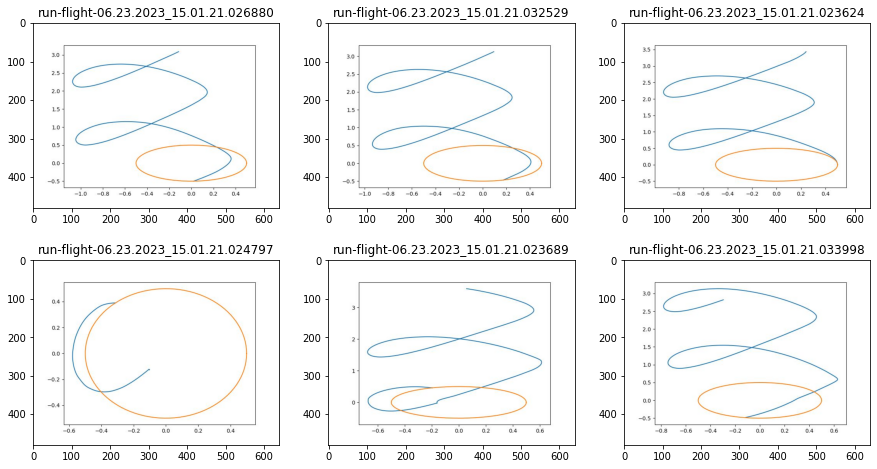

In [126]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, folder in enumerate(os.listdir(eval_dir)[-16:]):
    try:
        path = plt.imread(os.path.join(eval_dir, folder, "path.jpg"))
        axs[i//4, i%4].imshow(path)
        axs[i//4, i%4].set_title(folder)
    except:
        pass

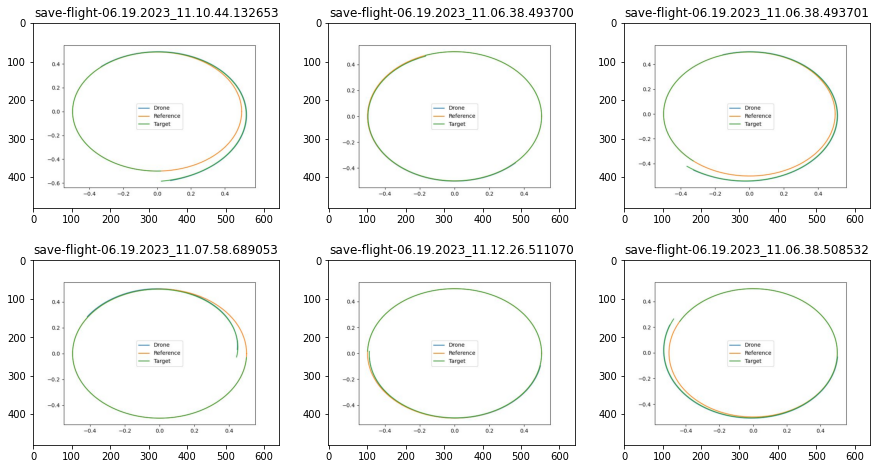

In [122]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, folder in enumerate(os.listdir(train_dir)[-16:]):
    try:
        path = plt.imread(os.path.join(train_dir, folder, "path.jpg"))
        axs[i//4, i%4].imshow(path)
        axs[i//4, i%4].set_title(folder)
    except:
        pass

### vision

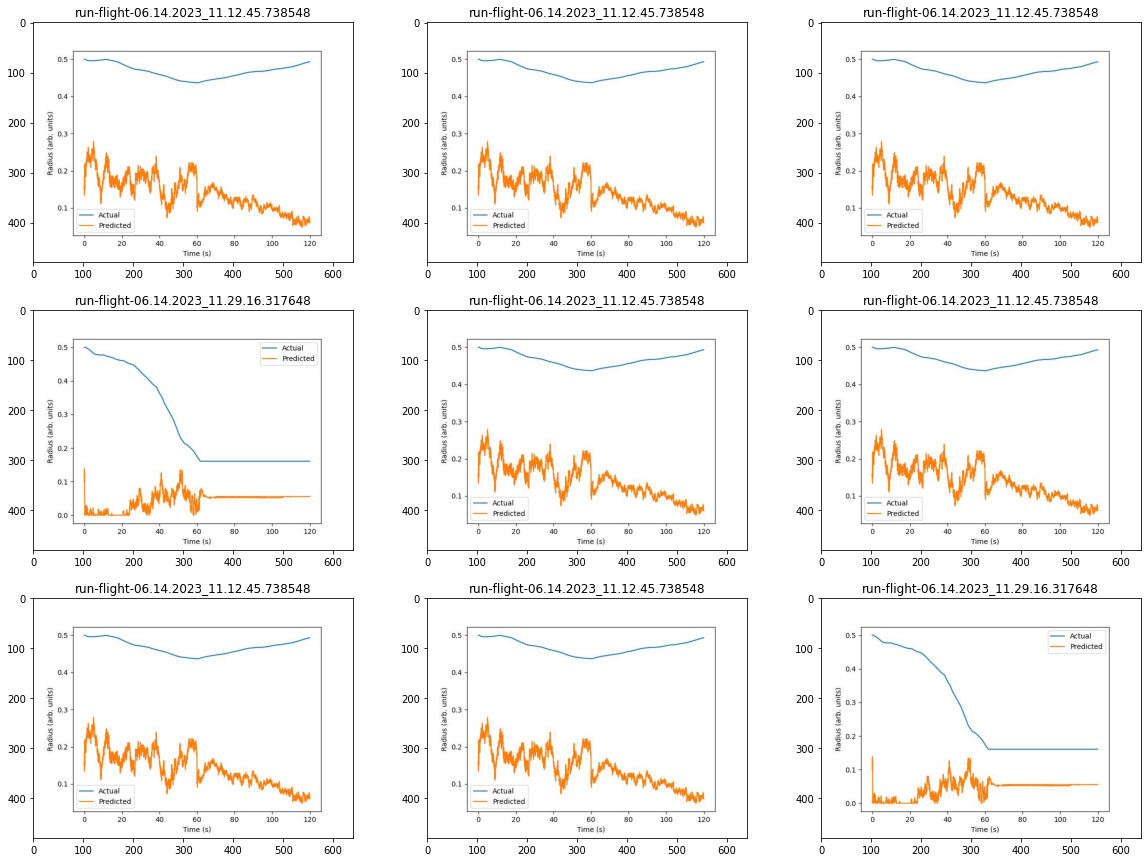

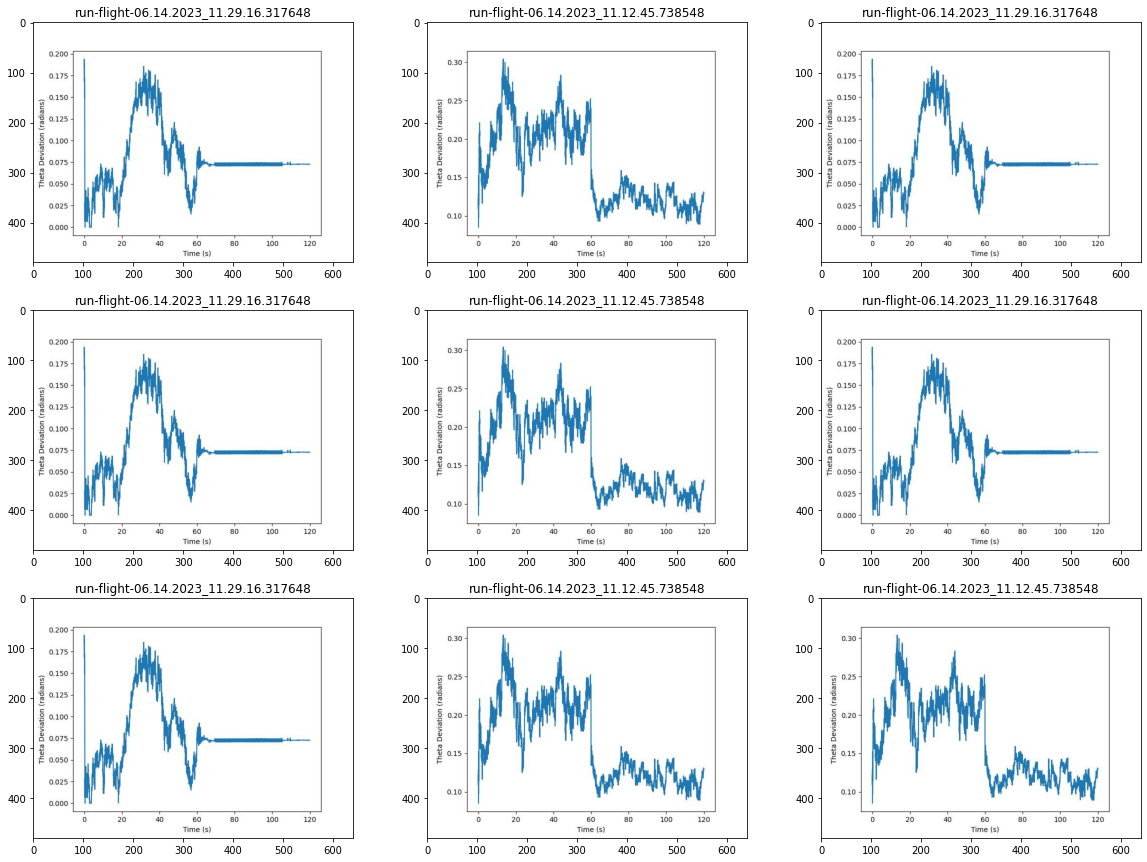

In [29]:
eval_dir = f"cl_v9_aug_split_v2"
# Dense(30, relu) => Dense (2) [radius, theta_offset]
# make a 9 plot diagram of path.jpg in 9 random folders, without replacement, in eval_dir:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
for i, folder in enumerate(np.random.choice(os.listdir(eval_dir), 9)):
    try:
        path = plt.imread(os.path.join(eval_dir, folder, "radius.jpg"))
        axs[i//3, i%3].imshow(path)
        axs[i//3, i%3].set_title(folder)
    except:
        pass
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
for i, folder in enumerate(np.random.choice(os.listdir(eval_dir), 9)):
    try:
        path = plt.imread(os.path.join(eval_dir, folder, "theta.jpg"))
        axs[i//3, i%3].imshow(path)
        axs[i//3, i%3].set_title(folder)
    except:
        pass

## Videos

In [90]:
version = "v11_fast"
eval_dir = f"cl2_{version}"

for run in sorted(os.listdir(eval_dir)):
    absolute_path = os.path.join(eval_dir, run)
    print(absolute_path)
    if "rand.mp4" not in os.listdir(absolute_path):
        # run ffmpeg command using python os package
        # supress output
        os.system(f"ffmpeg -framerate 120 -pattern_type glob -i '{absolute_path}/0*.png' -c:v libx264 -pix_fmt yuv420p {absolute_path}/rand.mp4 > /dev/null 2>&1")


cl2_v11_fast/run-flight-06.22.2023_19.38.35.116705
cl2_v11_fast/run-flight-06.22.2023_19.38.35.118874
cl2_v11_fast/run-flight-06.22.2023_19.38.35.119597
cl2_v11_fast/run-flight-06.22.2023_19.38.35.119838
cl2_v11_fast/run-flight-06.22.2023_19.38.35.139809
cl2_v11_fast/run-flight-06.22.2023_19.38.35.246548
cl2_v11_fast/run-flight-06.22.2023_19.38.35.268569
cl2_v11_fast/run-flight-06.22.2023_19.38.35.275063
cl2_v11_fast/run-flight-06.22.2023_19.38.35.373393
cl2_v11_fast/run-flight-06.22.2023_19.38.35.377228
cl2_v11_fast/run-flight-06.22.2023_19.38.35.378356
cl2_v11_fast/run-flight-06.22.2023_19.38.35.380052
cl2_v11_fast/run-flight-06.22.2023_19.38.35.481615
cl2_v11_fast/run-flight-06.22.2023_19.38.35.515491
cl2_v11_fast/run-flight-06.22.2023_19.38.35.518442
cl2_v11_fast/run-flight-06.22.2023_19.38.35.630293
cl2_v11_fast/run-flight-06.22.2023_19.48.59.955408
cl2_v11_fast/run-flight-06.22.2023_19.48.59.955787
cl2_v11_fast/run-flight-06.22.2023_19.48.59.957016
cl2_v11_fast/run-flight-06.22.2

In [91]:
index = 0
video_paths = [absolute_path for absolute_path in sorted(os.listdir(eval_dir)) if "rand.mp4" in os.listdir(os.path.join(eval_dir, absolute_path))]

In [67]:
index += 1

In [92]:
# play mp4 video in jupyter notebook:
from IPython.display import Video
print(f"{eval_dir}/{video_paths[index]}")
Video(os.path.join(eval_dir, video_paths[index], "rand.mp4"), width=640, height=480, html_attributes="controls autoplay playbackRate=2")

cl2_v11_fast/run-flight-06.22.2023_19.38.35.116705


In [77]:
arctan = np.arctan2(1, np.sqrt(3))
arctan

# in degrees
np.rad2deg(arctan)

30.000000000000004

In [78]:
-3 % np.pi

0.14159265358979312

In [81]:
np.log([0.1, 0.2, 1, 2, 3])

array([-2.30258509, -1.60943791,  0.        ,  0.69314718,  1.09861229])

## Plot Velocity Outputs

In [3]:
def plot_comparison(true_csv, pred_csv, title):
    # extract columns from vel_csv and plot each
    vel_pred = np.loadtxt(pred_csv, delimiter=",", skiprows=1)
    vel_true = np.loadtxt(true_csv, delimiter=",", skiprows=1)
    # plt subfigure with 2 rows and 1 column
    fig, axs = plt.subplots(2, 2, figsize=(7.5, 5))
    axs = axs.flatten()

    axs[0].plot(vel_true[:, 0], label="vx_true")
    axs[0].plot(vel_pred[:, 0], label="vx_pred")

    axs[1].plot(vel_true[:, 1], label="vy_true")
    axs[1].plot(vel_pred[:, 1], label="vy_pred")

    axs[2].plot(vel_true[:, 2], label="vz_true")
    axs[2].plot(vel_pred[:, 2], label="vz_pred")

    axs[3].plot(vel_true[:, 3], label="omega_z_true")
    axs[3].plot(vel_pred[:, 3], label="omega_z_pred")

    fig.suptitle(f"Train/Replay Velocity {title}")
    axs[3].set_xlabel("frame")

    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[3].legend()
    fig.show()

    loss = np.mean((vel_true - vel_pred)**2, axis=0)
    print(loss)
    print(np.sum(loss))


### v11

[5.92905756e-07 8.70163708e-06 1.39909849e-06 3.23710579e-06]
1.3930747115624506e-05


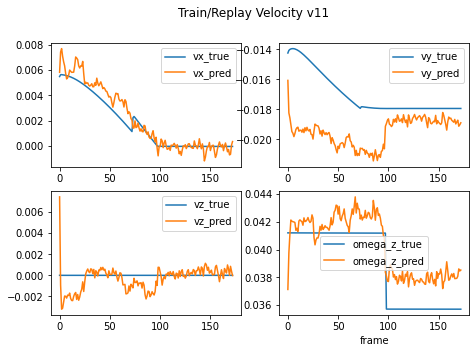

In [ ]:
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11/save-flight-06.14.2023_11.16.35.532550/data_out.csv"
pred_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, "v11")

### v11 early

[3.93185985e-06 3.36637054e-05 1.51517743e-06 4.08561997e-04]
0.00044767273920098827


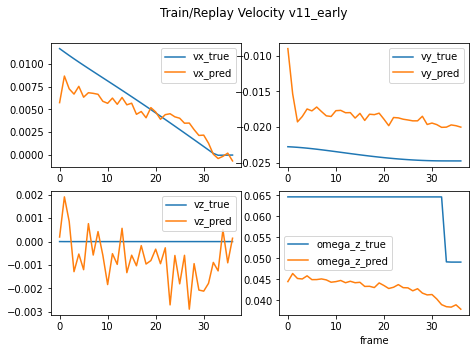

In [ ]:
model = "v11_early"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_early/save-flight-06.19.2023_11.06.38.493638/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v11 fast

[5.41371971e-04 1.59017611e-04 3.78152573e-05 1.05862678e-03]
0.0017968316139997248


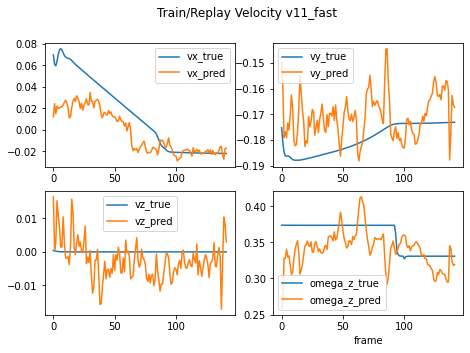

In [123]:
model = "v11_fast"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fast/save-flight-06.22.2023_11.43.22.402338/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v11 fast init

[1.21419111e-04 8.03235065e-04 6.21864321e-05 1.14894116e-03]
0.0021357817710649404


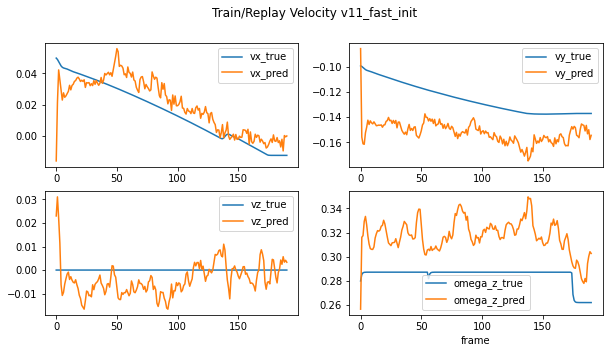

In [ ]:
model = "v11_fast_init"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fast_init/save-flight-06.22.2023_16.05.57.787631/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v11 fast init pp

[0.00013214 0.00010115 0.00012639 0.00046516]
0.0008248468411014532


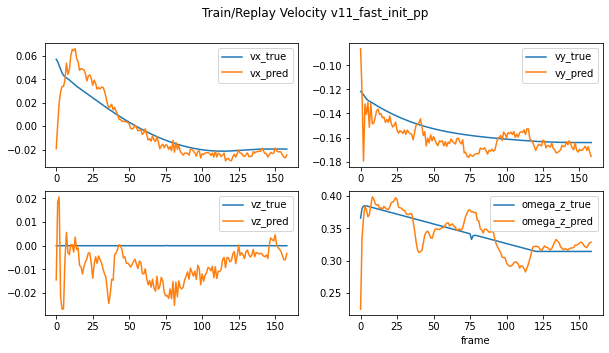

In [ ]:
model = "v11_fast_init_pp"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fast_init_pp/save-flight-06.22.2023_16.37.04.959115/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v11 fast init pp big

[6.80062505e-06 1.07947573e-05 1.27799255e-06 6.15770424e-05]
8.045041726768123e-05


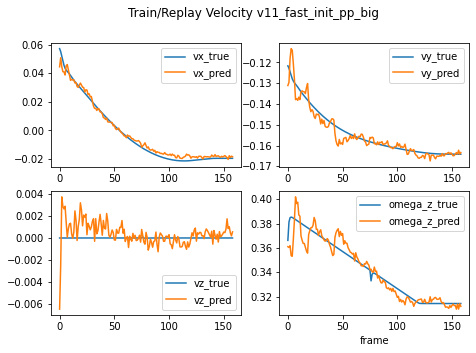

In [112]:
model = "v11_fast_init_pp_big"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fast_init_pp/save-flight-06.22.2023_16.37.04.959115/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v11 debug (generated w v11 fast init pp big)

[4.85243851e-06 2.28210195e-05 6.70536362e-07 1.19460595e-04]
0.00014780458914536294


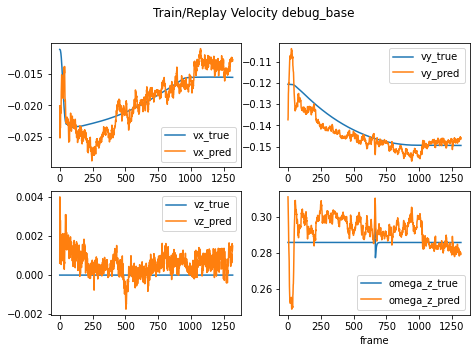

In [5]:
model = "debug_base"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_replay_debug_base/save-flight-06.27.2023_15.07.06.384563/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v12

[1.05927849e-05 2.36335723e-06 3.81994457e-07 7.73571341e-06]
2.107384995856343e-05


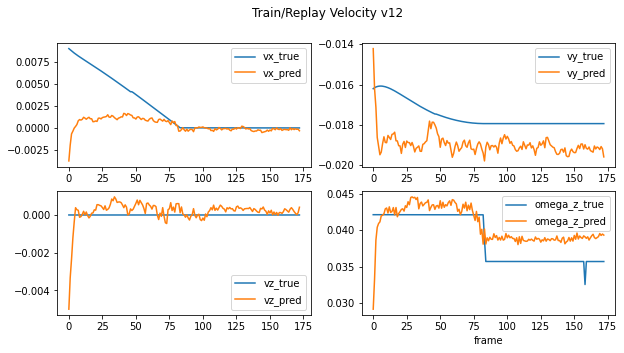

In [73]:
model = "v12"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v12/save-flight-06.15.2023_00.32.59.125812/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v11 fpp Early

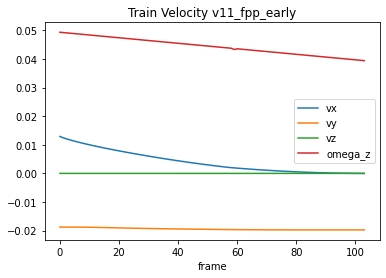

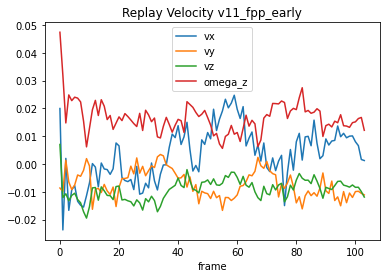

In [22]:
import numpy as np
import matplotlib.pyplot as plt

vel_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fpp_early/save-flight-06.17.2023_09.27.50.397513/data_out.csv"
# extract columns from vel_csv and plot each
vel_true = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_true[:, 0], label="vx")
plt.plot(vel_true[:, 1], label="vy")
plt.plot(vel_true[:, 2], label="vz")
plt.plot(vel_true[:, 3], label="omega_z")
plt.title("Train Velocity v11_fpp_early")
plt.xlabel("frame")
plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early")
plt.xlabel("frame")

plt.legend()

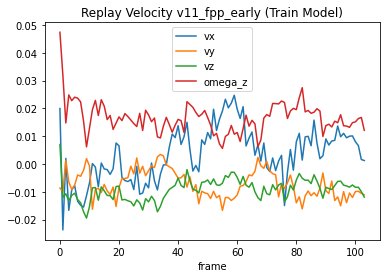

In [18]:
vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early (Train Model)")
plt.xlabel("frame")

plt.legend()

In [15]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[0.00352728 0.00087162 0.00127904 0.00133856]
0.0070164939169050245


In [19]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[1.50289377e-04 1.73438643e-04 9.90282225e-05 8.03179127e-04]
0.0012259353695778146


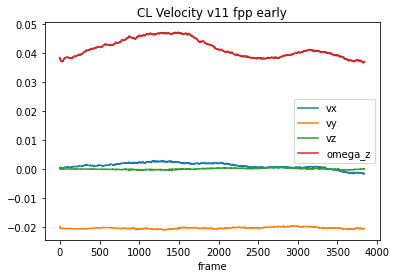

In [37]:
vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/cl2_v11_fpp_early_800/run-flight-06.22.2023_10.24.09.538220/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel[:, 0], label="vx")
plt.plot(vel[:, 1], label="vy")
plt.plot(vel[:, 2], label="vz")
plt.plot(vel[:, 3], label="omega_z")
plt.title("CL Velocity v11 fpp early")
plt.xlabel("frame")

plt.legend()

### v11 fpp early 400 epochs

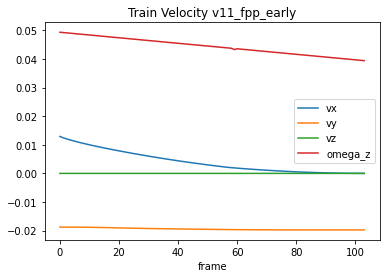

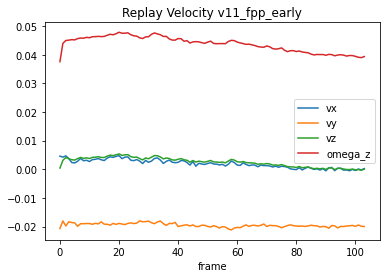

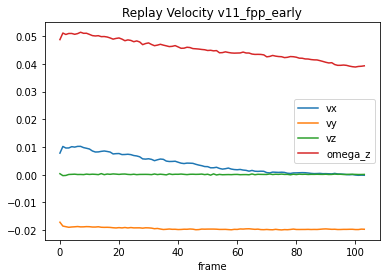

In [19]:
import numpy as np
import matplotlib.pyplot as plt

vel_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fpp_early/save-flight-06.17.2023_09.27.50.397513/data_out.csv"
# extract columns from vel_csv and plot each
vel_true = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_true[:, 0], label="vx")
plt.plot(vel_true[:, 1], label="vy")
plt.plot(vel_true[:, 2], label="vz")
plt.plot(vel_true[:, 3], label="omega_z")
plt.title("Train Velocity v11_fpp_early")
plt.xlabel("frame")
plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early")
plt.xlabel("frame")

plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early_800/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early_800")
plt.xlabel("frame")

plt.legend()

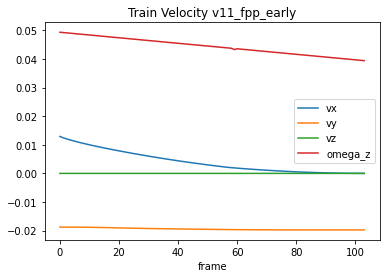

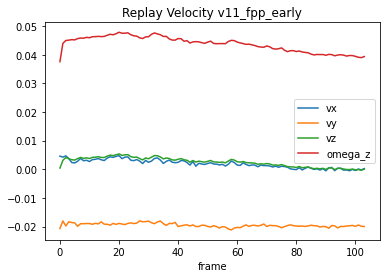

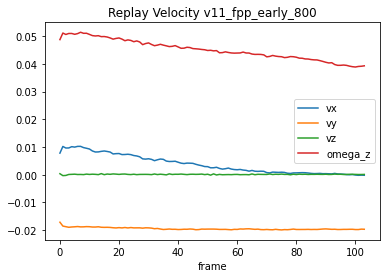

In [35]:
import numpy as np
import matplotlib.pyplot as plt

vel_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fpp_early/save-flight-06.17.2023_09.27.50.397513/data_out.csv"
# extract columns from vel_csv and plot each
vel_true = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_true[:, 0], label="vx")
plt.plot(vel_true[:, 1], label="vy")
plt.plot(vel_true[:, 2], label="vz")
plt.plot(vel_true[:, 3], label="omega_z")
plt.title("Train Velocity v11_fpp_early")
plt.xlabel("frame")
plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early")
plt.xlabel("frame")

plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early_800/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early_800")
plt.xlabel("frame")

plt.legend()

In [24]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[4.78764593e-04 3.16799166e-04 6.79443859e-05 1.64902178e-03]
0.0025125299292891685


In [22]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[0.00065287 0.00013736 0.00594542 0.00907686]
0.015812506002447012


### Train base

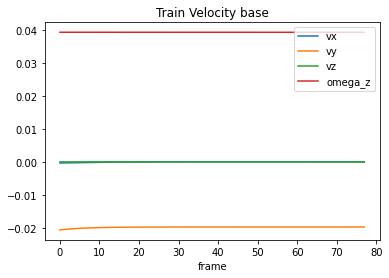

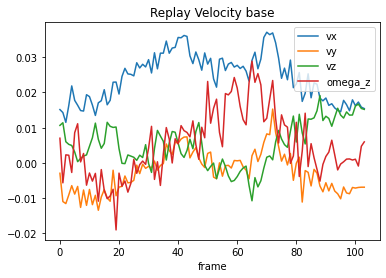

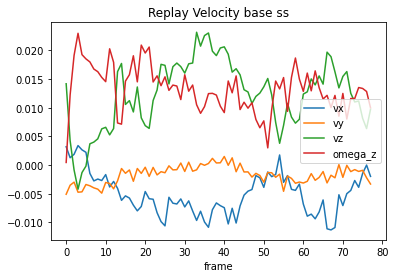

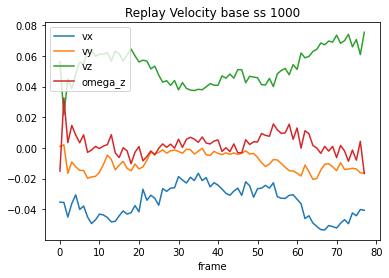

In [10]:
import numpy as np
import matplotlib.pyplot as plt

vel_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_base/save-flight-06.21.2023_07.29.13.667912/data_out.csv"
# extract columns from vel_csv and plot each
vel_true = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_true[:, 0], label="vx")
plt.plot(vel_true[:, 1], label="vy")
plt.plot(vel_true[:, 2], label="vz")
plt.plot(vel_true[:, 3], label="omega_z")
plt.title("Train Velocity base")
plt.xlabel("frame")
plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early_400/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity base")
plt.xlabel("frame")

plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_base_ss/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity base ss")
plt.xlabel("frame")

plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_base_ss_1000/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity base ss 1000")
plt.xlabel("frame")

plt.legend()

In [21]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[3.86928701e-05 3.30543493e-04 1.86689911e-04 6.95840880e-04]
0.0012517671539779415


In [11]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[0.00134438 0.00014898 0.00292475 0.00142674]
0.005844852052616154


### Train v11 early ss

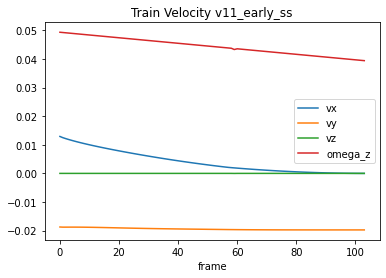

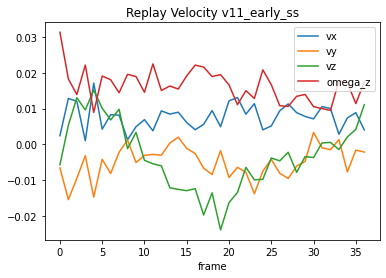

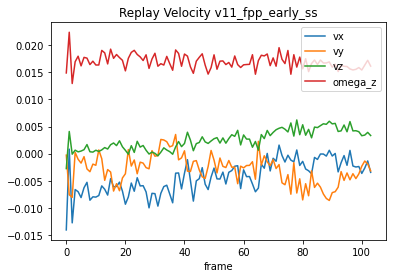

In [18]:
import numpy as np
import matplotlib.pyplot as plt

vel_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_early/save-flight-06.19.2023_11.06.38.493638/data_out.csv"
vel_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fpp_early/save-flight-06.17.2023_09.27.50.397513/data_out.csv"
# extract columns from vel_csv and plot each
vel_true = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_true[:, 0], label="vx")
plt.plot(vel_true[:, 1], label="vy")
plt.plot(vel_true[:, 2], label="vz")
plt.plot(vel_true[:, 3], label="omega_z")
plt.title("Train Velocity v11_early_ss")
plt.xlabel("frame")
plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_early_ss/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_early_ss")
plt.xlabel("frame")

plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early_ss/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early_ss")
plt.xlabel("frame")

plt.legend()

In [19]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[1.09274307e-04 2.79199418e-04 9.77432679e-06 7.57859490e-04]
0.0011561075422271568


## Train Dataset analysis

mean: -8.649340971709214e-08
std: 1.3203751500567862e-05
min: -5.9657933158669546e-05
max: 5.70289172494244e-05


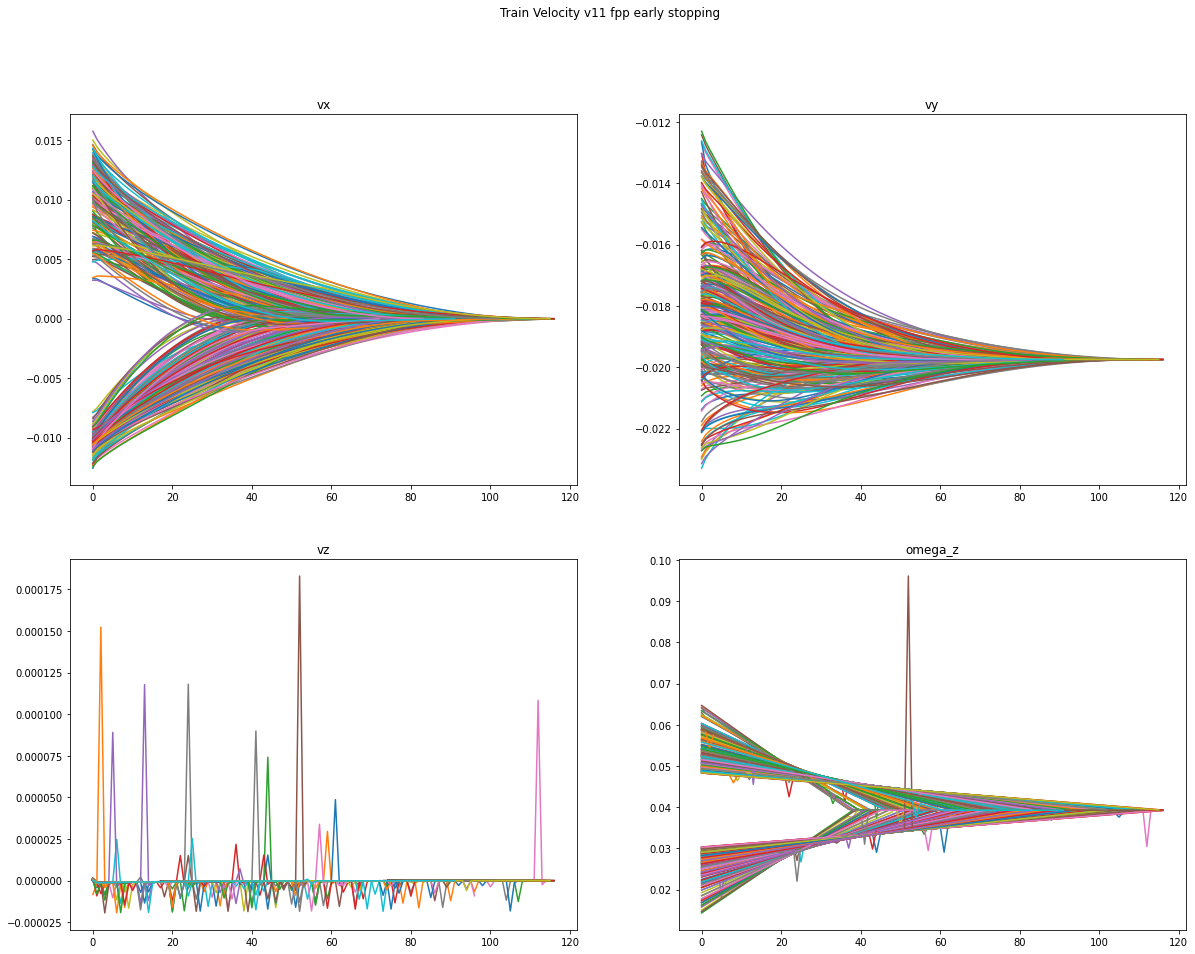

In [12]:
folder_path = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fpp_early"

vels = [[], [], [], []]
# extract all columns from vel_csv and plot each:
for sub_folder in os.listdir(folder_path):
    # aggregate each of the 4 columns into a list
    vel = np.loadtxt(os.path.join(folder_path, sub_folder, "data_out.csv"), delimiter=",", skiprows=1)
    for i in range(4):
        vels[i].append(vel[:, i])

x, y, z, omega = vels

last_xs = []
for run in x:
    last_xs.append(run[-1])

print(f"mean: {np.mean(last_xs)}")
print(f"std: {np.std(last_xs)}")
print(f"min: {np.min(last_xs)}")
print(f"max: {np.max(last_xs)}")

# create panel of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Train Velocity v11 fpp early stopping')
# plot each of the 4 columns in a different subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_title(["vx", "vy", "vz", "omega_z"][i])
    for run in vels[i]:
        ax.plot(run)

mean: -1.875302235255017e-05
std: 1.1177625088047978e-05
min: -4.738402936743235e-05
max: -4.331097095319411e-06


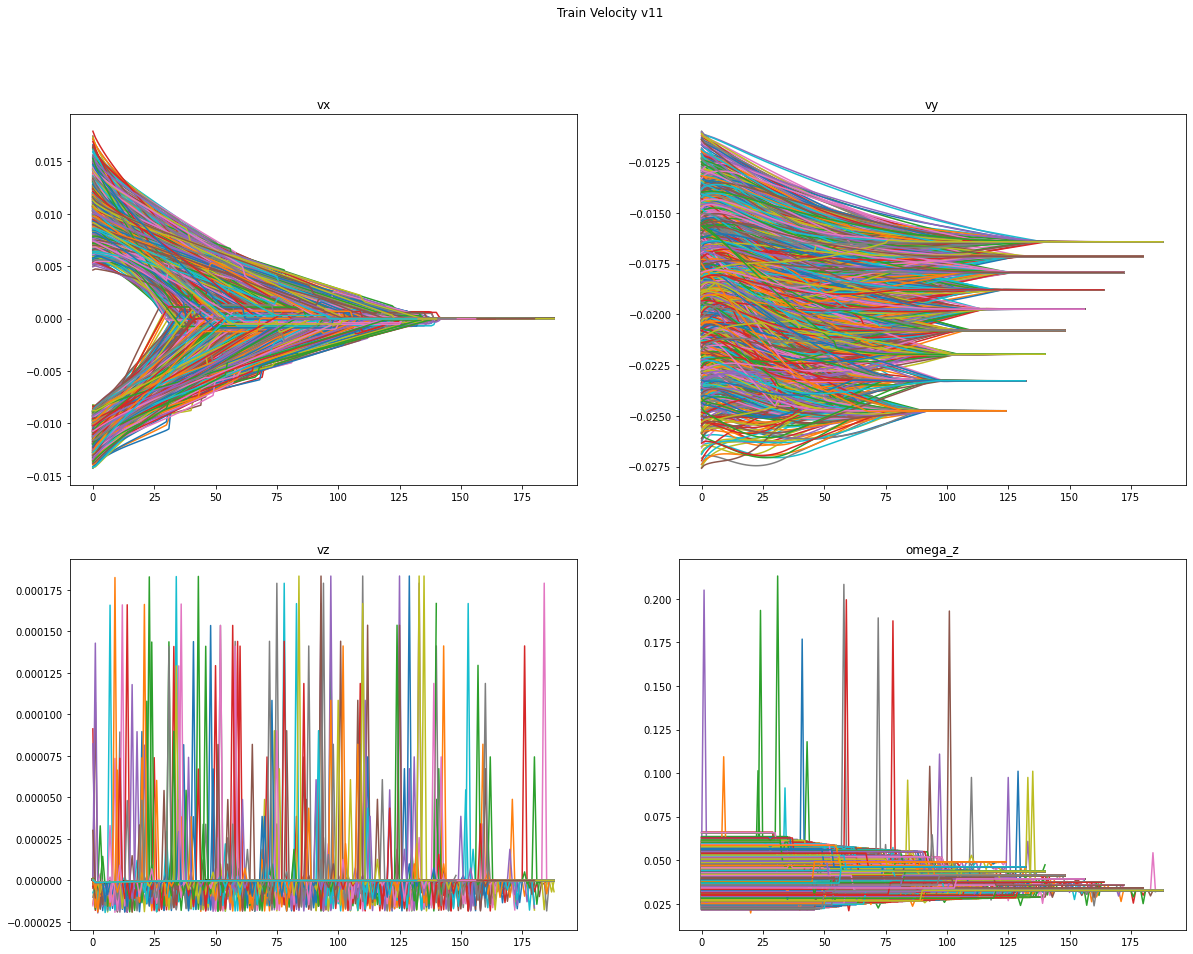

In [13]:
folder_path = "/home/makramchahine/repos/drone_multimodal/clean_train_v11"

vels = [[], [], [], []]
# extract all columns from vel_csv and plot each:
for sub_folder in os.listdir(folder_path):
    # aggregate each of the 4 columns into a list
    vel = np.loadtxt(os.path.join(folder_path, sub_folder, "data_out.csv"), delimiter=",", skiprows=1)
    for i in range(4):
        vels[i].append(vel[:, i])

x, y, z, omega = vels

last_xs = []
for run in x:
    last_xs.append(run[-1])

print(f"mean: {np.mean(last_xs)}")
print(f"std: {np.std(last_xs)}")
print(f"min: {np.min(last_xs)}")
print(f"max: {np.max(last_xs)}")

# create panel of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle("Train Velocity v11")
# plot each of the 4 columns in a different subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_title(["vx", "vy", "vz", "omega_z"][i])
    for run in vels[i]:
        ax.plot(run)


mean: -1.6049467905669622e-05
std: 3.0345913540228804e-06
min: -1.9083662703762994e-05
max: -1.2130367094700945e-05


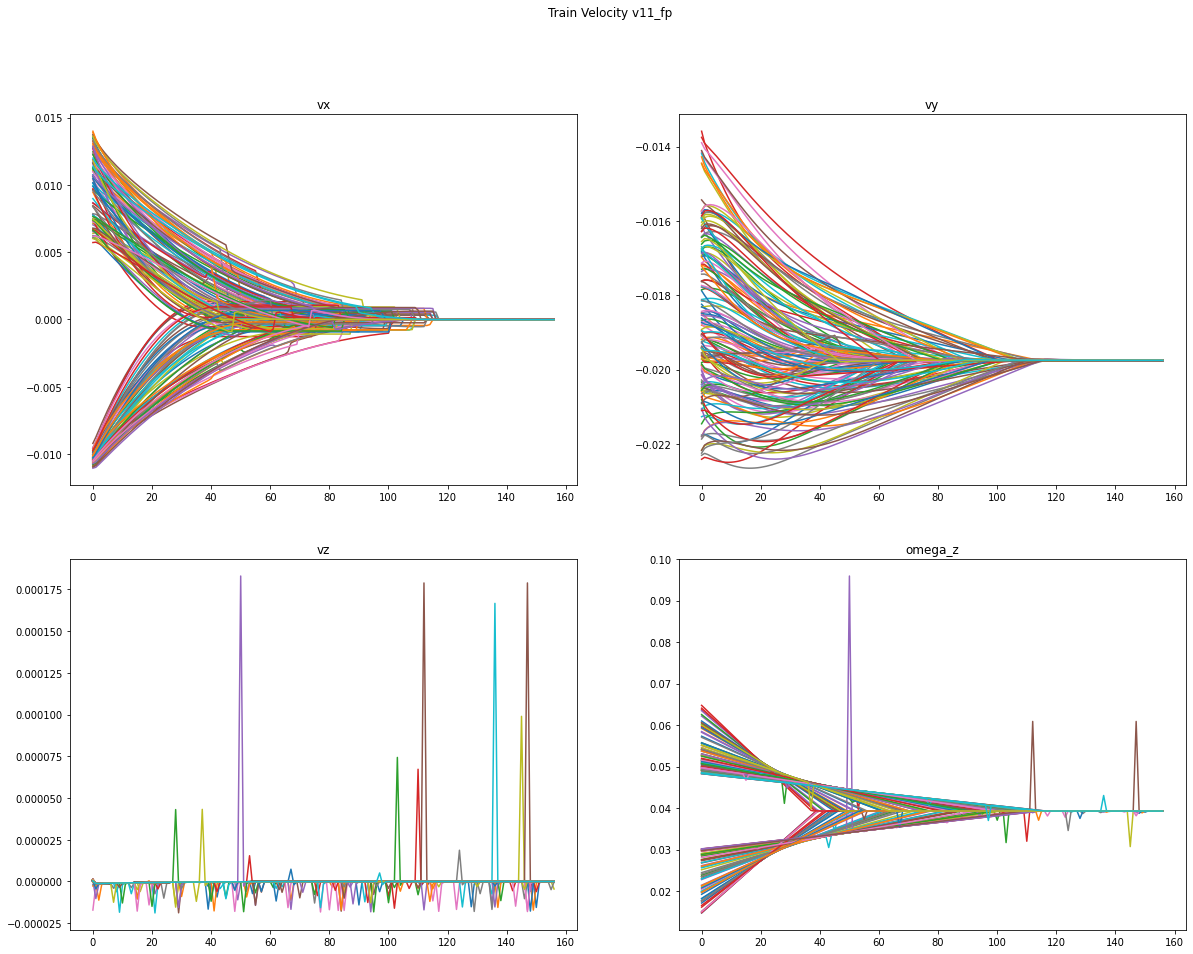

In [53]:
folder_path = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fp"

vels = [[], [], [], []]
# extract all columns from vel_csv and plot each:
for sub_folder in os.listdir(folder_path):
    # aggregate each of the 4 columns into a list
    vel = np.loadtxt(os.path.join(folder_path, sub_folder, "data_out.csv"), delimiter=",", skiprows=1)
    for i in range(4):
        vels[i].append(vel[:, i])

x, y, z, omega = vels

last_xs = []
for run in x:
    last_xs.append(run[-1])

print(f"mean: {np.mean(last_xs)}")
print(f"std: {np.std(last_xs)}")
print(f"min: {np.min(last_xs)}")
print(f"max: {np.max(last_xs)}")

# create panel of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Train Velocity v11_fp')
# plot each of the 4 columns in a different subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_title(["vx", "vy", "vz", "omega_z"][i])
    for run in vels[i]:
        ax.plot(run)

## Sanity Check

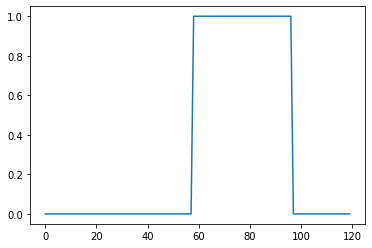

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# create black image of size 244 x 168
IMAGE_SHAPE = (144, 256, 3)
img = np.zeros(IMAGE_SHAPE, np.uint8)
folder_path = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/sanity_check_black/"
# make path directory if it doesn't exist
if not os.path.exists(path):
    os.makedirs(path)

for i in range(300):
    run_folder = os.path.join(folder_path, f"run_{str(i).zfill(6)}")
    if not os.path.exists(run_folder):
        os.makedirs(run_folder)

    # create signal that is binary, 1 for 40-60 frames, 0 for 40-60 frames, then 1 for the remaining frames
    signal = np.zeros(120)
    start = np.random.randint(40, 60)
    end = np.random.randint(80, 100)
    np.put(signal, range(start, end), 1)

    csv_data = []

    # save image as png with naming scheme "000000.png"
    for i in range(120):
        Image.fromarray(img).save(os.path.join(run_folder, str(i).zfill(6) + ".png"))
        if signal[i] == 1:
            csv_data.append([0.01, 0.008, 0.02, 0.02])
        else:
            csv_data.append([0.001, -0.01, 0.01, 0.03])

        # img.save(os.path.join(path,str(i).zfill(6)+".png"))

    csv_data = np.array(csv_data, dtype=np.float32)
    csv_header = "vx,vy,vz,omega_z"
    np.savetxt(os.path.join(run_folder, "data_out.csv"), csv_data, delimiter=",", header=csv_header, comments="", fmt="%f")

    signal_vector = [[1,0] if value == 1 else [0,1] for value in signal]
    csv_in = np.array(signal_vector, dtype=np.int32)
    csv_header = "L,R"
    np.savetxt(os.path.join(run_folder, "data_in.csv"), csv_in, delimiter=",", header=csv_header, comments="", fmt="%i")


plt.plot(signal)


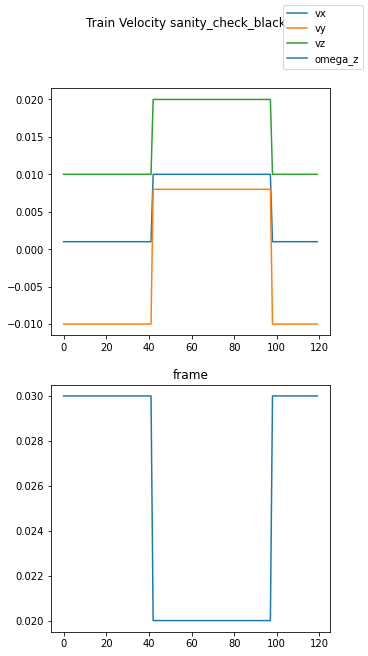

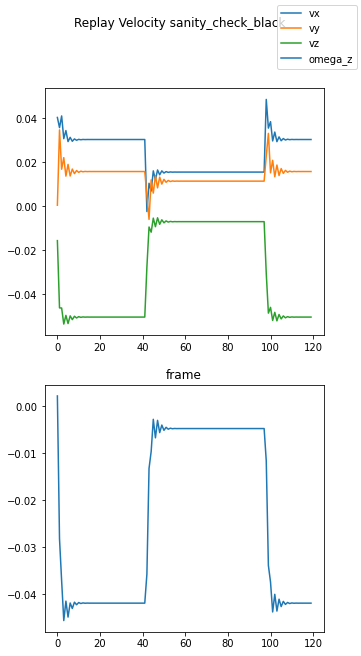

In [30]:
import numpy as np
import matplotlib.pyplot as plt

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/sanity_check_black/run_000000/data_out.csv"
# extract columns from vel_csv and plot each
vel_true = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
# plt subfigure with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
axs[0].plot(vel_true[:, 0], label="vx")
axs[0].plot(vel_true[:, 1], label="vy")
axs[0].plot(vel_true[:, 2], label="vz")
axs[1].plot(vel_true[:, 3], label="omega_z")
fig.suptitle("Train Velocity sanity_check_black")
axs[1].set_title("frame")
fig.legend()
fig.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_sanity_check_black/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
axs[0].plot(vel_pred[:, 0], label="vx")
axs[0].plot(vel_pred[:, 1], label="vy")
axs[0].plot(vel_pred[:, 2], label="vz")
axs[1].plot(vel_pred[:, 3], label="omega_z")
fig.suptitle("Replay Velocity sanity_check_black")
axs[1].set_title("frame")

fig.legend()
fig.show()

# vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early_ss/vel_cmd.csv"
# # extract columns from vel_csv and plot each
# vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
# plt.plot(vel_pred[:, 0], label="vx")
# plt.plot(vel_pred[:, 1], label="vy")
# plt.plot(vel_pred[:, 2], label="vz")
# plt.plot(vel_pred[:, 3], label="omega_z")
# plt.title("Replay Velocity v11_fpp_early_ss")
# plt.xlabel("frame")

# plt.legend()

[0.00051417 0.00038999 0.00224355 0.0029795 ]
0.0061272079831994775


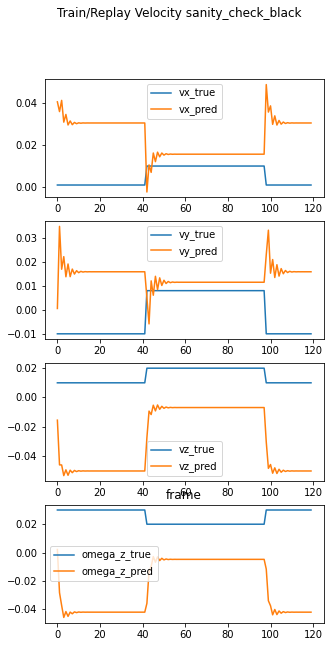

In [7]:
true_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/sanity_check_black/run_000000/data_out.csv"
pred_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_sanity_check_black/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(pred_csv, delimiter=",", skiprows=1)
vel_true = np.loadtxt(true_csv, delimiter=",", skiprows=1)
# plt subfigure with 2 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 10))

axs[0].plot(vel_true[:, 0], label="vx_true")
axs[0].plot(vel_pred[:, 0], label="vx_pred")

axs[1].plot(vel_true[:, 1], label="vy_true")
axs[1].plot(vel_pred[:, 1], label="vy_pred")

axs[2].plot(vel_true[:, 2], label="vz_true")
axs[2].plot(vel_pred[:, 2], label="vz_pred")

axs[3].plot(vel_true[:, 3], label="omega_z_true")
axs[3].plot(vel_pred[:, 3], label="omega_z_pred")

fig.suptitle("Train/Replay Velocity sanity_check_black")
axs[3].set_title("frame")

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
fig.show()

loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))


[1.73061343e-07 9.32963434e-07 3.23981332e-07 2.80778921e-07]
1.7107850296663295e-06


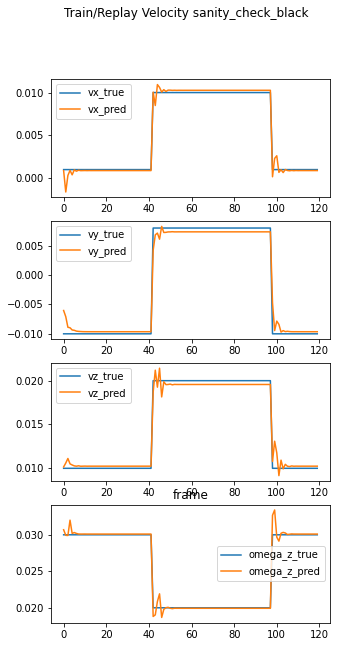

In [6]:
true_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/sanity_check_black/run_000000/data_out.csv"
pred_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_sanity_check_black_200/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(pred_csv, delimiter=",", skiprows=1)
vel_true = np.loadtxt(true_csv, delimiter=",", skiprows=1)
# plt subfigure with 2 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 10))

axs[0].plot(vel_true[:, 0], label="vx_true")
axs[0].plot(vel_pred[:, 0], label="vx_pred")

axs[1].plot(vel_true[:, 1], label="vy_true")
axs[1].plot(vel_pred[:, 1], label="vy_pred")

axs[2].plot(vel_true[:, 2], label="vz_true")
axs[2].plot(vel_pred[:, 2], label="vz_pred")

axs[3].plot(vel_true[:, 3], label="omega_z_true")
axs[3].plot(vel_pred[:, 3], label="omega_z_pred")

fig.suptitle("Train/Replay Velocity sanity_check_black")
axs[3].set_title("frame")

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
fig.show()

loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))


[0.00051417 0.00038999 0.00224355 0.0029795 ]
0.0061272079831994775
[1.73061343e-07 9.32963434e-07 3.23981332e-07 2.80778921e-07]
1.7107850296663295e-06


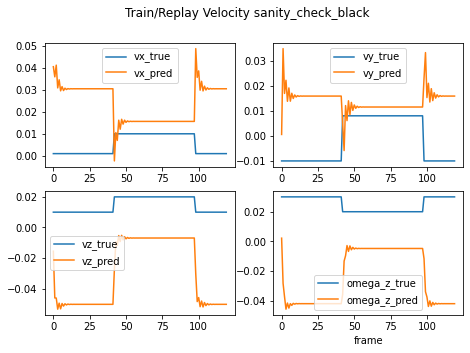

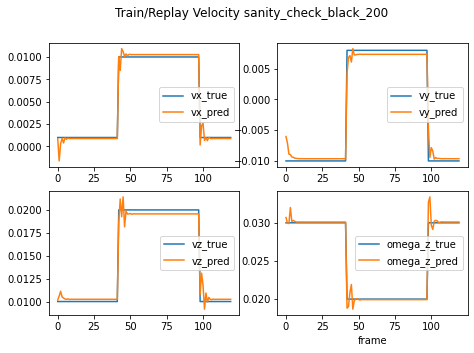

In [111]:
model = "sanity_check_black"
true_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/sanity_check_black/run_000000/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

model = "sanity_check_black_200"
true_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/sanity_check_black/run_000000/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)